<a href="https://colab.research.google.com/github/ishitaaasingh/MACHINE-LEARNING-MODE/blob/main/MACHINE_LEARNING_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset loaded. Shape: (5572, 2)
label
ham     4825
spam     747
Name: count, dtype: int64 

Train size: 4457 Test size: 1115

Model training completed.

Evaluation on test set:
Accuracy:  0.9677
Precision: 1.0000
Recall:    0.7584
F1 score:  0.8626

Classification report:
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       966
        spam       1.00      0.76      0.86       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115

Confusion matrix saved as confusion_matrix.png
Trained model saved to spam_model.pkl

Message: Congratulations! You've won a $1000 Walmart gift card. Go to http://bit.ly/12345 to claim now.
Predicted label: spam

Message: Hi Sonia, can we meet tomorrow for the project update?
Predicted label: ham

Done — everything ran in one cell. If you want a simpler model or
different evaluation metrics, tell

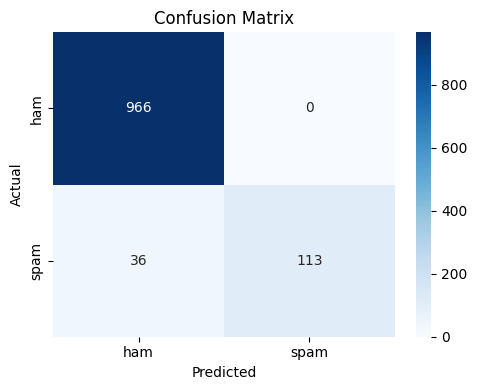

In [1]:


# 1) Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os

# 2) Load dataset (SMS Spam Collection). This raw tsv is commonly used and public.
DATA_URL = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_table(DATA_URL, header=None, names=["label", "text"])
print("Dataset loaded. Shape:", df.shape)
print(df.label.value_counts(), "\n")

# 3) Simple preprocessing: map labels to binary
df['label_num'] = df.label.map({'ham': 0, 'spam': 1})

# 4) Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    df['text'], df['label_num'], test_size=0.2, random_state=42, stratify=df['label_num']
)
print("Train size:", X_train.shape[0], "Test size:", X_test.shape[0])

# 5) Create pipeline: TF-IDF -> Logistic Regression
pipeline = Pipeline([
    ("tfidf", TfidfVectorizer(strip_accents='unicode', lowercase=True, stop_words='english', max_df=0.9)),
    ("clf", LogisticRegression(solver='liblinear', random_state=42))
])

# 6) Train the model
pipeline.fit(X_train, y_train)
print("\nModel training completed.")

# 7) Evaluate on the test set
y_pred = pipeline.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nEvaluation on test set:")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 score:  {f1:.4f}\n")

print("Classification report:")
print(classification_report(y_test, y_pred, target_names=['ham','spam']))

# 8) Confusion matrix (and save figure)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['ham','spam'], yticklabels=['ham','spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.savefig("confusion_matrix.png")
print("Confusion matrix saved as confusion_matrix.png")

# 9) Save the trained pipeline to disk for later use
model_filename = "spam_model.pkl"
with open(model_filename, "wb") as f:
    pickle.dump(pipeline, f)
print("Trained model saved to", model_filename)

# 10) Example: how to load and predict new messages (printed example)
example_texts = [
    "Congratulations! You've won a $1000 Walmart gift card. Go to http://bit.ly/12345 to claim now.",
    "Hi Sonia, can we meet tomorrow for the project update?"
]
# load (demonstration using pipeline we already have in memory)
loaded_model = pipeline  # if you prefer to re-load from file: pickle.load(open(model_filename,'rb'))
preds = loaded_model.predict(example_texts)
for txt, p in zip(example_texts, preds):
    label = "spam" if p==1 else "ham"
    print("\nMessage:", txt)
    print("Predicted label:", label)

# 11) Final note to user
print("\nDone — everything ran in one cell. If you want a simpler model or")
print("different evaluation metrics, tell me which ones and I will modify this single-cell code.")
